# Repetition

[missade ca 10 min pga inget ljud]

Vi kan kolla på distributioner via t ex vanligt och kumulativt histogram, probplot, boxplot.   

Vi vill inte ha korrelationer mellan kolumner.  

Vi vill ha normaldistributioner för att väntevärdena ska vara linjära (medlet i y) så att vi kan göra en multipel linjär regression. Ett sätt att lösa icke-linjaritet är att gå upp i dimensioner (lägga till features) kanske även tillsammans med att ta bort vissa andra för att bryta t ex exponentiella distributioner.  

## Auto

In [15]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

auto = pd.read_csv("../data/Auto.csv")

y = auto["mpg"]
X = auto[["acceleration", "displacement", "weight"]]
X = np.column_stack((np.ones(X.shape[0]), X))
X

array([[1.000e+00, 1.200e+01, 3.070e+02, 3.504e+03],
       [1.000e+00, 1.150e+01, 3.500e+02, 3.693e+03],
       [1.000e+00, 1.100e+01, 3.180e+02, 3.436e+03],
       ...,
       [1.000e+00, 1.160e+01, 1.350e+02, 2.295e+03],
       [1.000e+00, 1.860e+01, 1.200e+02, 2.625e+03],
       [1.000e+00, 1.940e+01, 1.190e+02, 2.720e+03]], shape=(397, 4))

In [16]:
b = np.linalg.pinv(X.T @ X) @ X.T @ y

# Significance
k = len(b)-1
n = y.shape[0]
SSE = np.sum(np.square(y - (X @ b)))
var = SSE/(n-k-1)
S = np.sqrt(var)        # suspekt uppskattning av standardavvikelsen, var försiktig med att dra slutsatser
Syy = (n * np.sum(np.square(y)) - np.square(np.sum(y)))/n       # variansen av y vektorn
SSR = Syy - SSE # reducibelt fel som vi orsakat
sig_stat = (SSR / k) / S
print(f"Signifikans: {sig_stat}")    # F-statistik, svårt för oss att avgöra om detta är signifikant

p_sig = stats.f.sf(sig_stat, k, n-k-1)  # sannolikhetsvärde, vad är sannolikheten att vi ser värdet i sig_stat om nollhypotesen är sann
print(f"Sannolikhet: {p_sig}")   # sannolikheten att alla koefficienter är noll

Signifikans: 1317.1325416046452
Sannolikhet: 1.3318636098976508e-204


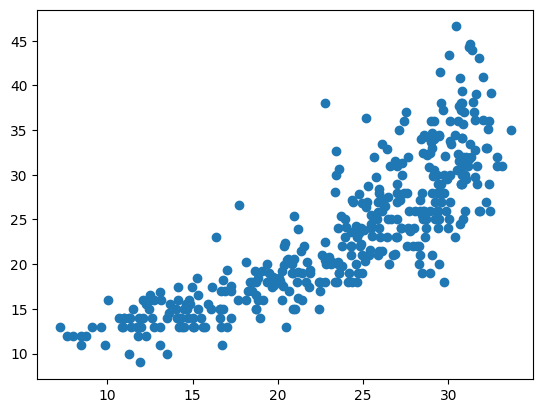

In [17]:
plt.scatter(X@b, y) # verkar stämma bättre för låga värden

In [19]:
# Hur bra är värdet? 

Rsq = SSR / Syy     # förklaringsgrad R², ger en procent. I allmänhet vill vi komma över 80 % så inte riktigt sigma 2
print(f"Förklaringsgrad: {Rsq}")

Förklaringsgrad: 0.7004763398988025


In [23]:
c = np.linalg.pinv(X.T @ X) * var   # varians-kovariansmatrisen

i = 1
b_stat = b[i] / (S * np.sqrt(c[i, i]))
p_b = 2 * min(stats.t.cdf(b_stat, n-k-1), stats.t.sf(b_stat, n-k-1))    # tvåsidigt test
print(b_stat)  # är det stort eller inte? svårt att säga, låt kolla på p värde
print(p_b)  # sannolikheten att vi ser detta värde om nollhypotesen är sann - inte relevant i detta fallet

i = 2
b_stat = b[i] / (S * np.sqrt(c[i, i]))
p_b = 2 * min(stats.t.cdf(b_stat, n-k-1), stats.t.sf(b_stat, n-k-1))    # tvåsidigt test
print(b_stat)  # är det stort eller inte? svårt att säga, låt kolla på p värde
print(p_b)  # sannolikheten att vi ser detta värde om nollhypotesen är sann - inte relevant i detta fallet

i = 3
b_stat = b[i] / (S * np.sqrt(c[i, i]))
p_b = 2 * min(stats.t.cdf(b_stat, n-k-1), stats.t.sf(b_stat, n-k-1))    # tvåsidigt test
print(b_stat)  # är det stort eller inte? svårt att säga, låt kolla på p värde
print(p_b)  # sannolikheten att vi ser detta värde om nollhypotesen är sann - inte relevant i detta fallet

0.4190907146062497
0.6753788017479894
-0.39084109393948113
0.6961264838672032
-1.9398051030009125
0.05311852314074284


Tredje parametern verkar alltså vara relevant så om vi tar bort övriga förutom "weight" kan vi se över bara den. Däremot så gav den lite sämre förklaringsgrad och ungefär samma scatter.  

Kanske finns en interaktionseffekt som är relevant? Det är nästa steg att testa. Vad Raphael kan säga är att detta är en termodynamisk relation som inte är linjär.  

Vi har ju också kategorisk data så vi kan lägga till det och göra signifikanstest på. Ändå då så att våra parametrar är "weight" och "year". Då blir det mycket bättre resultat! Men vi har ett litet problem, vi behandlar den kategoriska variabeln som numerisk. Vi borde göra datan till kategorisk, nu står det i årtal.  

Fördelen med linjär regression är att vi kan göra den här statistiken, det kan vi inte på andra ML-tekniker. Då får vi en mer frekventistisk testning för att se genom testning hur många gånger vi får rätt. Det finns alltså ingen statistik eller matematik för neurala nätverk eller annat.  